In [103]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [74]:
# loading the dataset.
df = pd.read_csv('diabetes.csv')

In [57]:
# Rescaling data ( between 0 and 1).
array = df.values
# separating array into input and output components.
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarizing the transformed data.
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [58]:
# Standardize data (0 mean, 1 stdev).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [59]:
# Normalize data (length of 1).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [63]:
# binarization of data.
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [64]:
#train_test_splitting of the dataset



from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [66]:
X_train

array([[5.00e+00, 1.08e+02, 7.20e+01, ..., 3.61e+01, 2.63e-01, 3.30e+01],
       [2.00e+00, 1.02e+02, 8.60e+01, ..., 4.55e+01, 1.27e-01, 2.30e+01],
       [4.00e+00, 1.58e+02, 7.80e+01, ..., 3.29e+01, 8.03e-01, 3.10e+01],
       ...,
       [0.00e+00, 5.70e+01, 6.00e+01, ..., 2.17e+01, 7.35e-01, 6.70e+01],
       [1.00e+00, 1.05e+02, 5.80e+01, ..., 2.43e+01, 1.87e-01, 2.10e+01],
       [8.00e+00, 1.79e+02, 7.20e+01, ..., 3.27e+01, 7.19e-01, 3.60e+01]])

In [106]:
# Spot-Checking Algorithms to use
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'DT' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
# evaluating each model in turn, using 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
# Output are mean and standard deviation accuracies.
results = []
names = []
for name, model in models:
    seed = 7
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.767372 (0.044529)
RF: 0.742808 (0.054825)
KNN: 0.710206 (0.049772)
DT: 0.661581 (0.056343)
NB: 0.749418 (0.041042)
SVM: 0.752723 (0.045559)


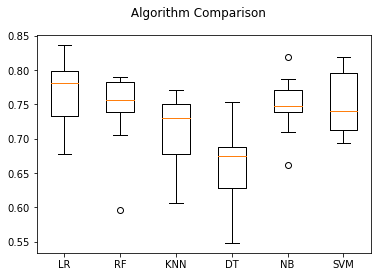

In [107]:
# Algorithm comparison on the spread and mean accuracy for each model.
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [108]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7922077922077922
[[88  9]
 [23 34]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        97
           1       0.79      0.60      0.68        57

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



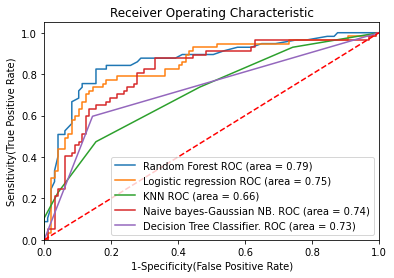

In [109]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'Logistic regression',
    'model': LogisticRegression(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [110]:
#file = open('LR.pkl', 'wb')
#pickle.dump(LR, file)
#file.close()

## Using pipelines.

In [111]:
# using pipelines to standardise data to avoid leakage and build the model for each fold in the cross validation test ahrness.
# this is ine of the methods to improve model performance.
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
LogisticRegression())])))
pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'Rf' ,
RandomForestClassifier())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
KNeighborsClassifier())])))
pipelines.append(( 'ScaledDT' , Pipeline([( 'Scaler' , StandardScaler()),( 'DT' ,
DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.778424 (0.061895)
ScaledRF: 0.750793 (0.063684)
ScaledKNN: 0.718297 (0.071563)
ScaledDT: 0.692121 (0.055297)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.752565 (0.064295)


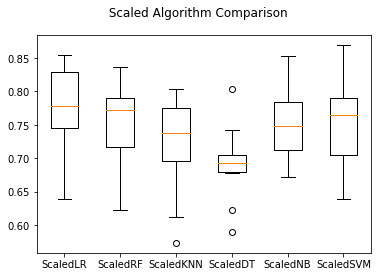

In [112]:
# plotting the distribution of the accuracy scores using box and whisker plots.
# Comparing Algorithms
fig = plt.figure()
fig.suptitle( ' Scaled Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Selection of the best two models using the Box ad whisker plot above.

In [113]:
## tuning the parameters for two algorithms that show promise from section above: Logistic model and SVM.

## Tuning the scaled models.

In [119]:
# Tuning scaled Logistic regression to improve accuracy.
# define models and parameters
model1 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.775120 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772534 (0.042527) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.775120 (0.041961) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772534 (0.042790) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.772534 (0.042527) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773827 (0.041817) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774265 (0.042894) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.772967 (0.042526) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772528 (0.041197) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.039862) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.769925 (0.044069) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.769948 (0.041871) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.729978 (0.040441) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.766889 (0.043692) with: {

In [120]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model2 = SVC()
kfold = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780090 using {'C': 0.1, 'kernel': 'linear'}
0.780090 (0.055426) with: {'C': 0.1, 'kernel': 'linear'}
0.711608 (0.066320) with: {'C': 0.1, 'kernel': 'poly'}
0.711713 (0.047940) with: {'C': 0.1, 'kernel': 'rbf'}
0.765362 (0.059384) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.780063 (0.060190) with: {'C': 0.3, 'kernel': 'linear'}
0.731280 (0.054733) with: {'C': 0.3, 'kernel': 'poly'}
0.754045 (0.067017) with: {'C': 0.3, 'kernel': 'rbf'}
0.750714 (0.060719) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.778451 (0.061394) with: {'C': 0.5, 'kernel': 'linear'}
0.736118 (0.072612) with: {'C': 0.5, 'kernel': 'poly'}
0.754098 (0.069671) with: {'C': 0.5, 'kernel': 'rbf'}
0.762110 (0.042649) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.778451 (0.061394) with: {'C': 0.7, 'kernel': 'linear'}
0.739397 (0.063104) with: {'C': 0.7, 'kernel': 'poly'}
0.745955 (0.060212) with: {'C': 0.7, 'kernel': 'rbf'}
0.747462 (0.050255) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.778451 (0.061394) with: {'C': 0.9, 'kernel': 'line

## Using Ensemble methods.

In [122]:
# Ensemble methods to improve on the accuracy.
ensembles = []
ensembles.append(( ' AB ' , AdaBoostClassifier()))
ensembles.append(( ' GBM ' , GradientBoostingClassifier()))
ensembles.append(( ' RF ' , RandomForestClassifier()))
ensembles.append(( ' ET ' , ExtraTreesClassifier()))
ensembles.append(( ' XGB ' , XGBClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 AB : 0.724775 (0.063334)
 GBM : 0.745796 (0.082900)
 RF : 0.745796 (0.071577)
 ET : 0.734611 (0.058966)
[15:46:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

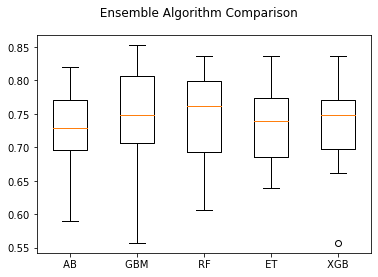

In [123]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle( ' Ensemble Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# The results above suggest Gradient Boosting method (GBM) may be worthy of further study, with a strong mean and a spread that skews up towards high 85s (%) in accuracy.

## Selection of the best model among the 3 models ie SVM, Logistic regression and GBM.

In [125]:
# finalising the model though choosing SVM as the best model.
# prepare the model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_SVM = SVC(C=0.1, kernel='linear')
model_SVM.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_SVM.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7922077922077922
[[91  6]
 [26 31]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        97
           1       0.84      0.54      0.66        57

    accuracy                           0.79       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.80      0.79      0.78       154



In [126]:
# saving the model.
import pickle
file = open('SVM_model.pkl', 'wb')
pickle.dump(model_SVM, file)
file.close()